[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/physics_agnostic.ipynb)

In [1]:
import sys
import os

! git clone https://github.com/Arif-PhyChem/MLQD.git

Cloning into 'MLQD'...
remote: Enumerating objects: 1008, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 1008 (delta 135), reused 206 (delta 97), pack-reused 724
Receiving objects: 100% (1008/1008), 34.97 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (427/427), done.
Updating files: 100% (80/80), done.


In [2]:
# install the required packages

! pip install tensorflow --upgrade
! pip install sklearn
! pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [3]:
# Add MLQD's path to system path

mlqd_dir='MLQD/dev_ver'
sys.path.append(mlqd_dir)

from evolution import quant_dyn



In [4]:
# get training and test data files from github
! git clone https://github.com/Arif-PhyChem/trace_conservation.git

Cloning into 'trace_conservation'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 136 (delta 15), reused 35 (delta 3), pack-reused 79
Receiving objects: 100% (136/136), 324.76 MiB | 20.51 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (54/54), done.


# Physics-agnostic NN for spin boson (SB) model

In the case of physics-agnostic neural networks, we train separate Convolutional Neural Networks (CNNs) for each element of the diagonal Reduced Density Matrix (RDM). We use a loss function to measure the difference between the NN-predicted values $\bar{\tilde{\rho}}_{{\rm S},nn}$ and their reference counterparts $\tilde{\rho}_{{\rm S},nn}$:

\begin{equation}
    \mathcal{L}_{nn} =  \sum_{m=1}^M \left(\bar{\tilde{\rho}}_{{\rm S},nn,m} - \tilde{\rho}_{{\rm S},nn,m} \right)^2,
\end{equation}

where $M$ is the number of training points and $m$ is the index of a training point.

Since these models are not informed about the dynamics of all states, they do not inherently understand trace conservation. To facilitate training in this process, we provide pre-prepared training files named 'x.npy' and 'y.npy'. Alternatively, you can create your own training files using the MLQD tool available on GitHub at [MLQD GitHub](https://github.com/Arif-PhyChem/MLQD), along with data from the QD3SET-1 database, accessible via the DOI link [QD3SET-1 DOI](https://doi.org/10.25452/figshare.plus.c.6389553).

## Spin boson (SB) model

Here we will train individual CNN models for each state. For quick run, we are setting training epochs 'TrEpochs' to 10, you should set it to a higher number for better training.




In [ ]:
# sb training files (x and y) for state 1 and state 2
! ls trace_conservation/training_data/sb/physics_agnostic/state_1
! ls trace_conservation/training_data/sb/physics_agnostic/state_2

x.npy  y.npy
x.npy  y.npy


In [13]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD
for i in range(1, 3):

  param={
    'n_states': 2,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/sb/physics_agnostic/state_' + str(i) + '/x',  # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/sb/physics_agnostic/state_' + str(i) + '/y',  # str: (Optional) The prepared Y file
      'hyperParam': 'False',  # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'SB',
      'QDmodelOut': 'sb_model_4_state_' + str(i)    # str: (Optional), providing a name to save the model at
      }
  quant_dyn(**param)



MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 - 23s - 12ms/step - loss: 6.5988e-04 - val_loss: 2.2402e-05
Epoch 2/10
2000/2000 - 41s - 20ms/step - loss: 3.7192e-05 - val_loss: 2.2162e-05
Epoch 3/10
2000/2000 - 41s - 20ms/step - loss: 2.6827e-05 - val_loss: 4.1636e-06
Epoch 4/10
2000/2000 - 40s - 20ms/step - loss: 1.8531e-05 - val_loss: 2.9639e-05
Epoch 5/10
2000/2000 - 24s - 12ms/step - loss: 1.0531e-05 - val_loss: 9.5729e-07
Epoch 6/10
2000/2000 - 40s - 20ms/step - loss: 7.2734e-06 - val_loss: 9.4558e-07
Epoch 7/10
2000/2000 - 42s - 21ms/step - loss: 5.3929e-06 - val_loss: 1.2360e-06
Epoch 8/10
2000/2000 - 38s - 19ms/step - loss: 5.6096e-06 - val_loss: 1.4530e-06
Epoch 9/10
2000/2000 - 41s - 21ms/step - loss: 6.7404e-06 - val_loss: 4.9705e-07
Epoch 10/10
2000/2000 - 21s - 11ms/step - loss: 5.2471e-06 - val_loss: 2.7733e-05
Restoring model weights from the end of the best epoch: 9.
cnn.OSTL_default: OSTL model is saved as " sb_model_4_state_1.keras "
Train_ml.RCDYN: Time taken for training = 370.77480125427246 sec
MLQD i

## Trace for a test trajectory

In [16]:
# test tarjectory
! ls trace_conservation/test_data/sb/

2_epsilon-0.0_Delta-1.0_lambda-0.2_gamma-10.0_beta-0.75.npy


****************************************************************
Predicting dynamics and calculating trace
****************************************************************


Text(0, 0.5, 'Trace')

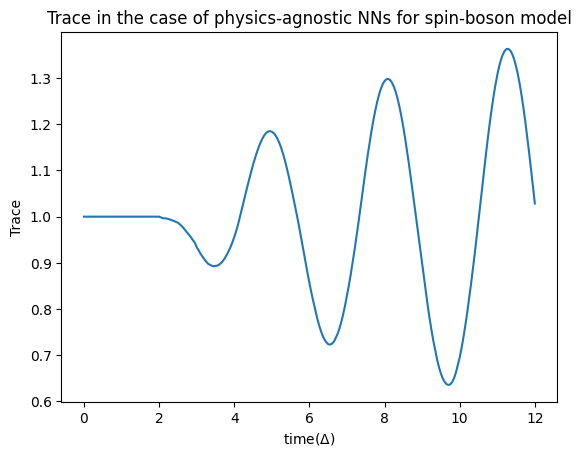

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
xx = np.load('trace_conservation/test_data/sb/2_epsilon-0.0_Delta-1.0_lambda-0.2_gamma-10.0_beta-0.75.npy')


n_states = 2
xlength = 41
time = 10
time_step = 0.05
time_range=0
tt = time_range

# time range
for i in range(0, xlength + int(time/time_step)-1):
    tt += time_step
    time_range = np.append(time_range, tt)


# trained CNN models
model_1 = tf.keras.models.load_model('sb_model_4_state_1.keras', compile=False)
model_2 = tf.keras.models.load_model('sb_model_4_state_2.keras', compile=False)

models = [model_1, model_2]

x = np.zeros((xlength, n_states), dtype=float)
y = np.zeros((len(time_range), n_states), dtype=float)
yhat = np.zeros((1, n_states), dtype=float)

trace = np.zeros((len(time_range), 1), dtype=float)
# columns no. with state population
labels = [1, 4]

# short time dynamics for input
i = 0
for label in labels:
    x[:,i] = np.real(xx[0:xlength, label])
    i += 1
y[0:xlength, :] = x[:,:]


# trace of the input dynamics
for i in range (0, xlength):
  tr = 0
  for j in labels:
    tr += np.real(xx[i, j])
  trace[i, 0] = tr


print('****************************************************************')
print('Predicting dynamics and calculating trace')
print('****************************************************************')

for i in range(xlength, len(time_range)):
    l =0
    for j in range (0, n_states):
        x_pred = x[:, j]
        x_pred = x_pred.reshape(1, x.shape[0], 1) # reshape the input
        yhat[0, j] =  models[l].predict(x_pred, verbose=0)[0][0]
        l += 1

    #
    trace[i, 0] = np.sum(yhat)
    x = np.delete(x, 0, 0)
    x = np.r_[x, yhat]
    y[i, :] = yhat[0, :]

plt.plot(time_range, trace)
plt.title('Trace in the case of physics-agnostic NNs for spin-boson model')
plt.xlabel('time($\Delta$)')
plt.ylabel('Trace')

## As these models are not exposed to the dynamics of all states, they lack knowledge of trace conservation. Therefore, they fail to conserve trace.

# Let's do it for FMO complex

Here for quick run, we train CNN models only for 10 epochs "TrEpochs" = 10, however for better training, you should train it for more epochs

In [5]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD
for i in range(1, 8):
  param={
    'n_states': 7,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/fmo/physics_agnostic/site_'+ str(i) + '/x',           # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/fmo/physics_agnostic/site_' + str(i) + '/y',           # str: (Optional) The prepared Y file
      'hyperParam': 'False',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'FMO',
      'QDmodelOut': 'fmo_model_4_site_' + str(i)    # str: (Optional), providing a name to save the model at
      }
  quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1800/1800 - 20s - 11ms/step - loss: 3.0357e-04 - val_loss: 5.0612e-05
Epoch 2/10
1800/1800 - 21s - 12ms/step - loss: 2.9112e-05 - val_loss: 6.1726e-06
Epoch 3/10
1800/1800 - 18s - 10ms/step - loss: 2.7733e-05 - val_loss: 6.9749e-06
Epoch 4/10
1800/1800 - 17s - 10ms/step - loss: 1.8554e-05 - val_loss: 1.7481e-06
Epoch 5/10
1800/1800 - 24s - 13ms/step - loss: 1.3993e-05 - val_loss: 4.9326e-06
Epoch 6/10
1800/1800 - 41s - 23ms/step - loss: 8.9296e-06 - val_loss: 8.2907e-07
Epoch 7/10
1800/1800 - 17s - 10ms/step - loss: 5.8464e-06 - val_loss: 3.7443e-06
Epoch 8/10
1800/1800 - 17s - 10ms/step - loss: 4.0426e-06 - val_loss: 1.7557e-06
Epoch 9/10
1800/1800 - 21s - 11ms/step - loss: 4.2498e-06 - val_loss: 2.4999e-05
Epoch 10/10
1800/1800 - 20s - 11ms/step - loss: 6.8018e-06 - val_loss: 4.4276e-06
Restoring model weights from the end of the best epoch: 6.
cnn.OSTL_default: OSTL model is saved as " fmo_model_4_site_1.keras "
Train_ml.RCDYN: Time taken for training = 218.28808522224426

****************************************************************
Predicting dynamics and calculating trace
****************************************************************


Text(0, 0.5, 'Trace')

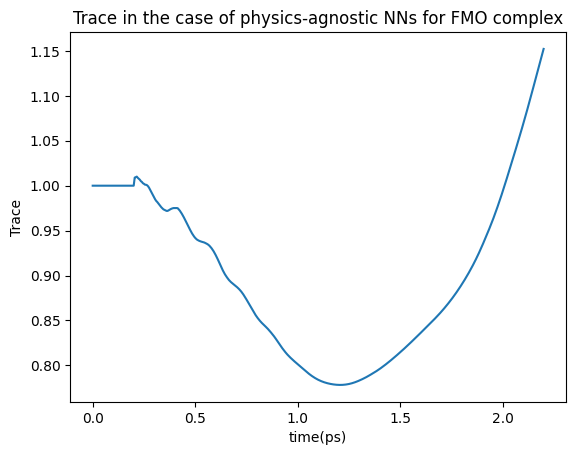

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
xx = np.load('trace_conservation/test_data/fmo/7_initial-1_gamma-475.0_lambda-10.0_temp-30.0.npy')


n_sites = 7
xlength = 41
time = 2
time_step = 0.005
time_range=0
tt = time_range

# time range
for i in range(0, xlength + int(time/time_step)-1):
    tt += time_step
    time_range = np.append(time_range, tt)


# load trained CNN models
model_1 = tf.keras.models.load_model('fmo_model_4_site_1.keras', compile=False)
model_2 = tf.keras.models.load_model('fmo_model_4_site_2.keras', compile=False)
model_3 = tf.keras.models.load_model('fmo_model_4_site_3.keras', compile=False)
model_4 = tf.keras.models.load_model('fmo_model_4_site_4.keras', compile=False)
model_5 = tf.keras.models.load_model('fmo_model_4_site_5.keras', compile=False)
model_6 = tf.keras.models.load_model('fmo_model_4_site_6.keras', compile=False)
model_7 = tf.keras.models.load_model('fmo_model_4_site_7.keras', compile=False)

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]

x = np.zeros((xlength, n_sites), dtype=float)
y = np.zeros((len(time_range), n_sites), dtype=float)
yhat = np.zeros((1, n_sites), dtype=float)

trace = np.zeros((len(time_range), 1), dtype=float)
# column no. with population
labels = [1, 9, 17, 25, 33, 41, 49]

# short time dynamics for input
i = 0
for label in labels:
    x[:,i] = np.real(xx[0:xlength, label])
    i += 1
y[0:xlength, :] = x[:,:]


# trace of the input dynamics
for i in range (0, xlength):
  tr = 0
  for j in labels:
    tr += np.real(xx[i, j])
  trace[i, 0] = tr


print('****************************************************************')
print('Predicting dynamics and calculating trace')
print('****************************************************************')

for i in range(xlength, len(time_range)):
    l =0
    for j in range (0, n_sites):
        x_pred = x[:, j]
        x_pred = x_pred.reshape(1, x.shape[0], 1) # reshape the input
        yhat[0, j] =  models[l].predict(x_pred, verbose=0)[0][0]
        l += 1

    #
    trace[i, 0] = np.sum(yhat)
    x = np.delete(x, 0, 0)
    x = np.r_[x, yhat]
    y[i, :] = yhat[0, :]

plt.plot(time_range, trace)
plt.title('Trace in the case of physics-agnostic NNs for FMO complex')
plt.xlabel('time(ps)')
plt.ylabel('Trace')

## Similar to SB case, these models are not exposed to the dynamics of all states, so they lack knowledge of trace conservation. Therefore, they fail to conserve trace.